In [2]:
pip install imbalanced-learn shap umap-learn joblib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("D:\Collage\Computer Science S3\Introduction to Data Science\Assignment\DataSets\marketing_campaign.csv", sep="\t")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df['Response'].value_counts()


Response
0    1906
1     334
Name: count, dtype: int64

In [8]:
import pandas as pd

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

max_date = df['Dt_Customer'].max()
df['Customer_Tenure_Days'] = (max_date - df['Dt_Customer']).dt.days


In [9]:
df = df.dropna(subset=['Income'])


In [10]:
monetary_cols = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]

df['Total_Spending'] = df[monetary_cols].sum(axis=1)

df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

df['Avg_Order_Value'] = df['Total_Spending'] / df['Total_Purchases'].replace(0, 1)


In [11]:
df['Web_Purchase_Ratio'] = df['NumWebPurchases'] / df['Total_Purchases'].replace(0,1)
df['Catalog_Purchase_Ratio'] = df['NumCatalogPurchases'] / df['Total_Purchases'].replace(0,1)
df['Store_Purchase_Ratio'] = df['NumStorePurchases'] / df['Total_Purchases'].replace(0,1)


In [12]:
df['High_Spender'] = (df['Total_Spending'] > df['Total_Spending'].median()).astype(int)
df['Frequent_Web_Visitor'] = (df['NumWebVisitsMonth'] >= 10).astype(int)


In [13]:
df = df.drop(columns=['Dt_Customer'])


In [14]:
# Identify categorical columns safely
cat_cols = [c for c in ['Education', 'Marital_Status'] if c in df.columns]

# Apply one-hot encoding ONLY if they exist
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [15]:
# Target column
y = df['Response']

# Features (drop Response)
X = df.drop(columns=['Response'])



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [19]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 1506, 1: 266})
After SMOTE: Counter({0: 1506, 1: 1506})


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [21]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_smote, y_train_smote)

logreg_pred = logreg.predict(X_test_scaled)

print("LOGISTIC REGRESSION")
print(classification_report(y_test, logreg_pred))
print("ROC-AUC:", roc_auc_score(y_test, logreg_pred))


LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       377
           1       0.47      0.78      0.59        67

    accuracy                           0.84       444
   macro avg       0.71      0.81      0.74       444
weighted avg       0.88      0.84      0.85       444

ROC-AUC: 0.8111366245694605


In [22]:
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train_smote, y_train_smote)

dt_pred = dt.predict(X_test_scaled)

print("DECISION TREE")
print(classification_report(y_test, dt_pred))
print("ROC-AUC:", roc_auc_score(y_test, dt_pred))


DECISION TREE
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       377
           1       0.31      0.61      0.41        67

    accuracy                           0.73       444
   macro avg       0.61      0.68      0.62       444
weighted avg       0.82      0.73      0.77       444

ROC-AUC: 0.683954234134368


In [23]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train_smote, y_train_smote)

rf_pred = rf.predict(X_test_scaled)

print("RANDOM FOREST")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_pred))


RANDOM FOREST
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       377
           1       0.59      0.48      0.53        67

    accuracy                           0.87       444
   macro avg       0.75      0.71      0.73       444
weighted avg       0.86      0.87      0.87       444

ROC-AUC: 0.7096282513163625


In [24]:
gb = GradientBoostingClassifier()
gb.fit(X_train_smote, y_train_smote)

gb_pred = gb.predict(X_test_scaled)

print("GRADIENT BOOSTING")
print(classification_report(y_test, gb_pred))
print("ROC-AUC:", roc_auc_score(y_test, gb_pred))


GRADIENT BOOSTING
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       377
           1       0.52      0.54      0.53        67

    accuracy                           0.86       444
   macro avg       0.72      0.72      0.72       444
weighted avg       0.86      0.86      0.86       444

ROC-AUC: 0.7248901381685735


In [25]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def tune_threshold(model, X, y_true, model_name="Model"):
    probs = model.predict_proba(X)[:, 1]   # probability of class 1
    
    best_t = 0.5
    best_f1 = 0.0
    best_prec = 0.0
    best_rec = 0.0
    
    thresholds = np.arange(0.1, 0.91, 0.01)
    
    for t in thresholds:
        y_pred_t = (probs >= t).astype(int)
        f1 = f1_score(y_true, y_pred_t)
        if f1 > best_f1:
            best_f1 = f1
            best_t = t
            best_prec = precision_score(y_true, y_pred_t)
            best_rec = recall_score(y_true, y_pred_t)
    
    print(f"\n=== {model_name} threshold tuning ===")
    print(f"Best threshold: {best_t:.2f}")
    print(f"Precision (1): {best_prec:.3f}")
    print(f"Recall (1):    {best_rec:.3f}")
    print(f"F1 (1):        {best_f1:.3f}")
    
    return best_t, best_prec, best_rec, best_f1


In [26]:
t_logreg = tune_threshold(logreg, X_test_scaled, y_test, "Logistic Regression")
t_rf     = tune_threshold(rf,     X_test_scaled, y_test, "Random Forest")
t_gb     = tune_threshold(gb,     X_test_scaled, y_test, "Gradient Boosting")



=== Logistic Regression threshold tuning ===
Best threshold: 0.48
Precision (1): 0.478
Recall (1):    0.806
F1 (1):        0.600

=== Random Forest threshold tuning ===
Best threshold: 0.41
Precision (1): 0.541
Recall (1):    0.597
F1 (1):        0.567

=== Gradient Boosting threshold tuning ===
Best threshold: 0.33
Precision (1): 0.456
Recall (1):    0.776
F1 (1):        0.575


In [27]:
import shap


C:\Users\rr826\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
explainer = shap.Explainer(logreg, X_train_scaled, feature_names=X.columns)
shap_values = explainer(X_test_scaled)


In [29]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


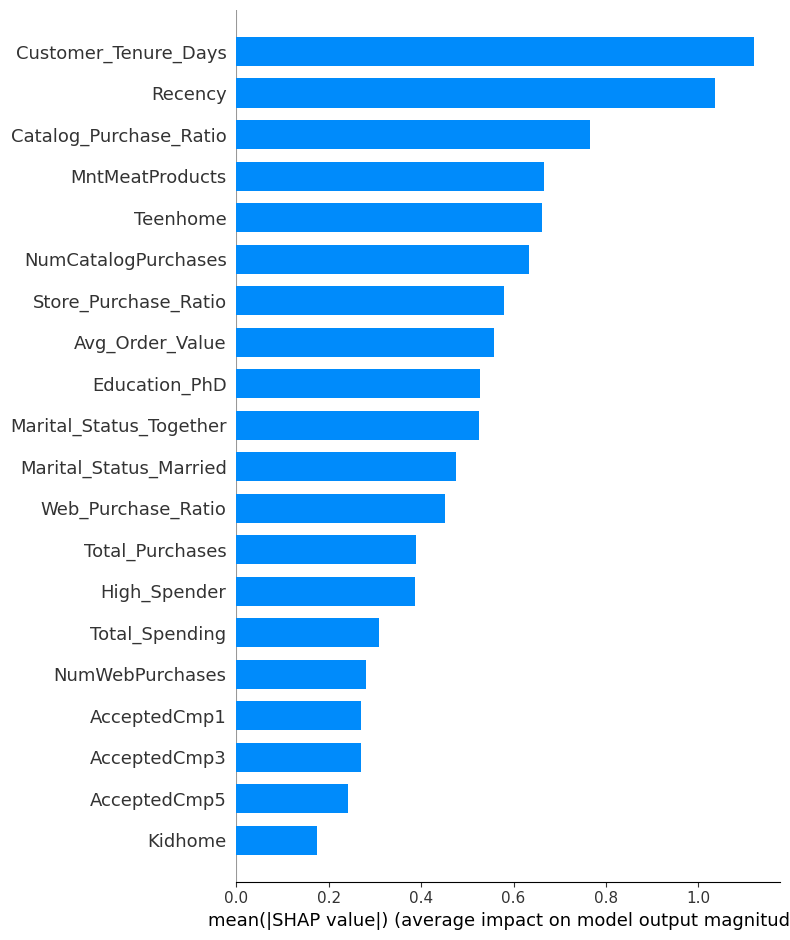

In [30]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)


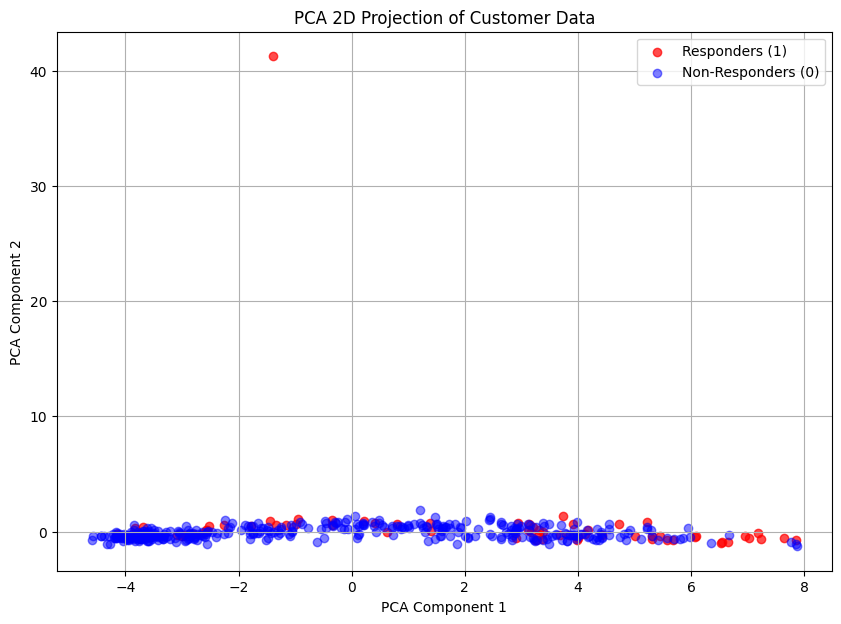

In [33]:
plt.figure(figsize=(10, 7))

# responders (1)
plt.scatter(X_pca[y_test == 1, 0], X_pca[y_test == 1, 1],
            c='red', label='Responders (1)', alpha=0.7)

# non-responders (0)
plt.scatter(X_pca[y_test == 0, 0], X_pca[y_test == 0, 1],
            c='blue', label='Non-Responders (0)', alpha=0.5)

plt.title("PCA 2D Projection of Customer Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
import umap
import matplotlib.pyplot as plt


In [35]:
umap_model = umap.UMAP(
    n_neighbors=20,      # how many neighbors to consider
    min_dist=0.1,        # how tightly points form clusters
    random_state=42
)

X_umap = umap_model.fit_transform(X_test_scaled)


C:\Users\rr826\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


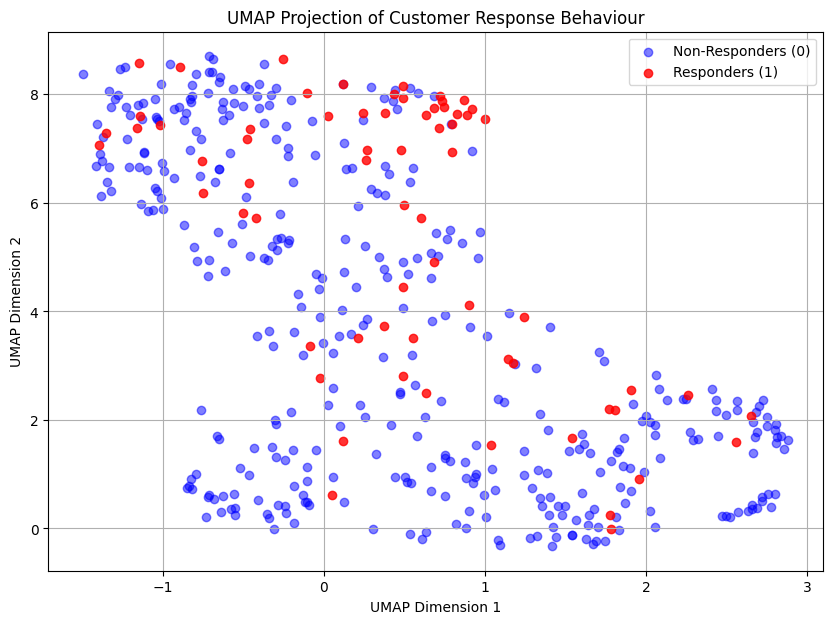

In [36]:
plt.figure(figsize=(10, 7))

# Non-Responders
plt.scatter(
    X_umap[y_test == 0, 0],
    X_umap[y_test == 0, 1],
    c='blue',
    alpha=0.5,
    label='Non-Responders (0)'
)

# Responders
plt.scatter(
    X_umap[y_test == 1, 0],
    X_umap[y_test == 1, 1],
    c='red',
    alpha=0.8,
    label='Responders (1)'
)

plt.title("UMAP Projection of Customer Response Behaviour")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


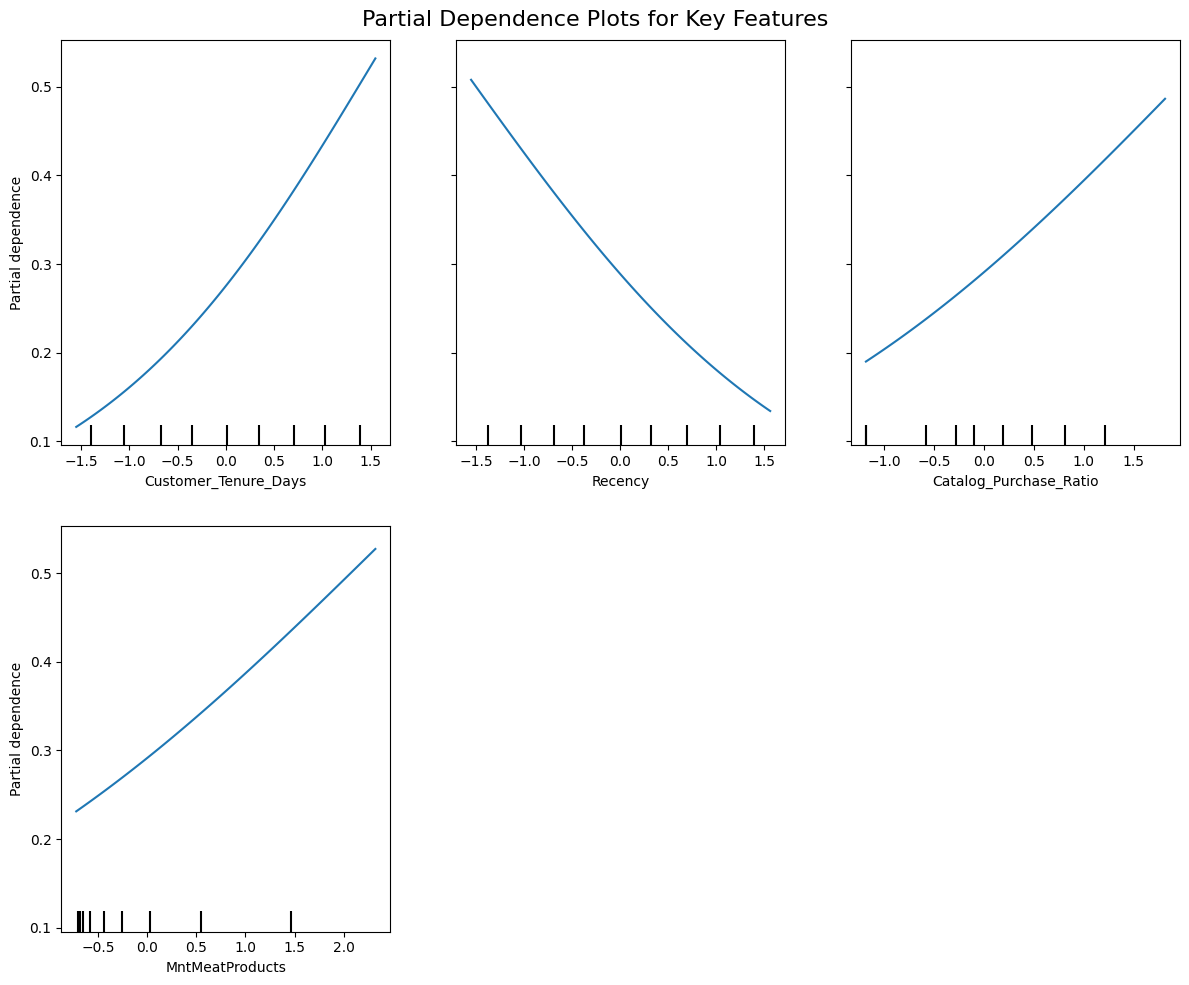

In [37]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [
    "Customer_Tenure_Days",
    "Recency",
    "Catalog_Purchase_Ratio",
    "MntMeatProducts"
]

fig, ax = plt.subplots(figsize=(12, 10))

PartialDependenceDisplay.from_estimator(
    logreg,          
    X_train_scaled, 
    features_to_plot,
    feature_names=X.columns,
    ax=ax
)

plt.suptitle("Partial Dependence Plots for Key Features", fontsize=16)
plt.tight_layout()
plt.show()


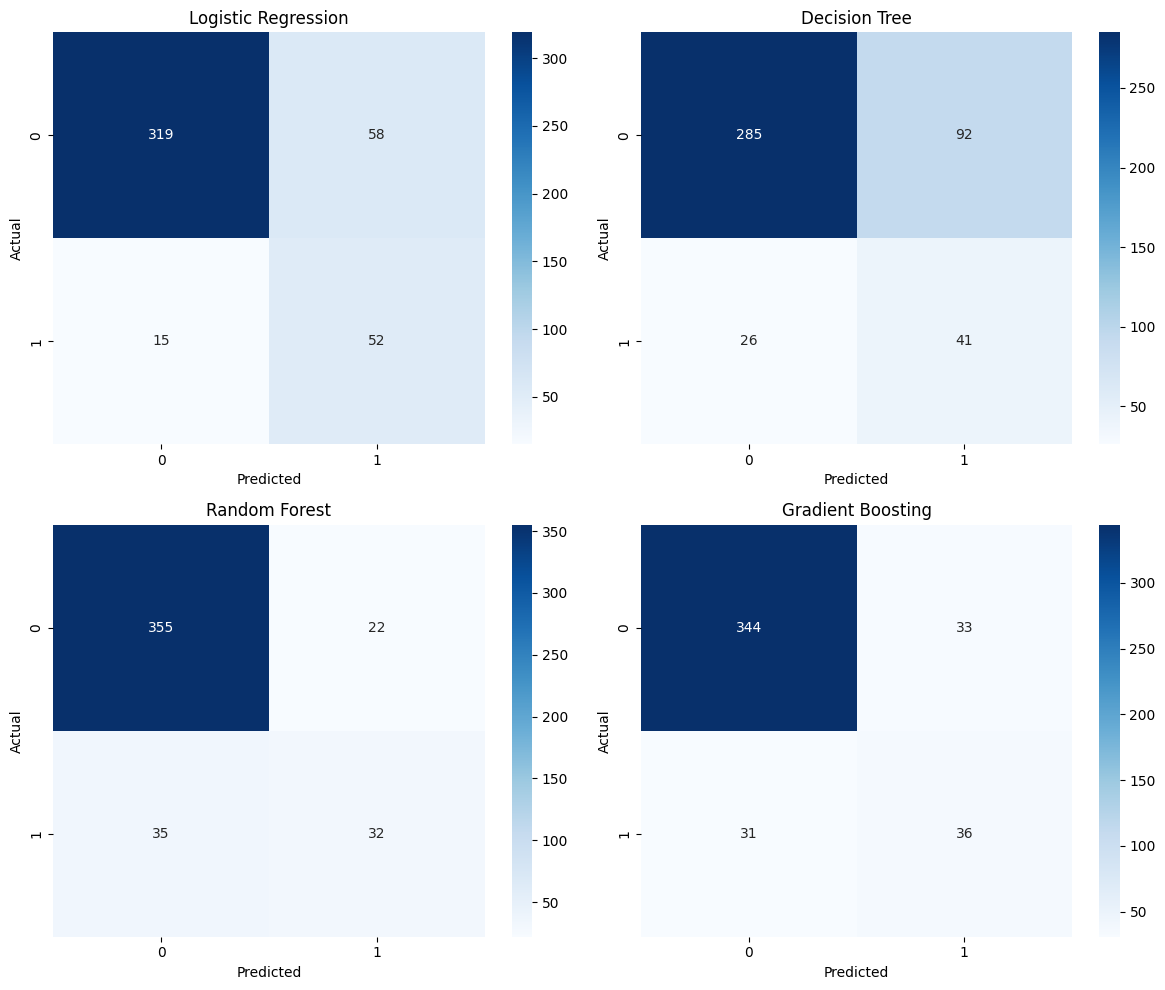

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

models = {
    "Logistic Regression": logreg_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, pred) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


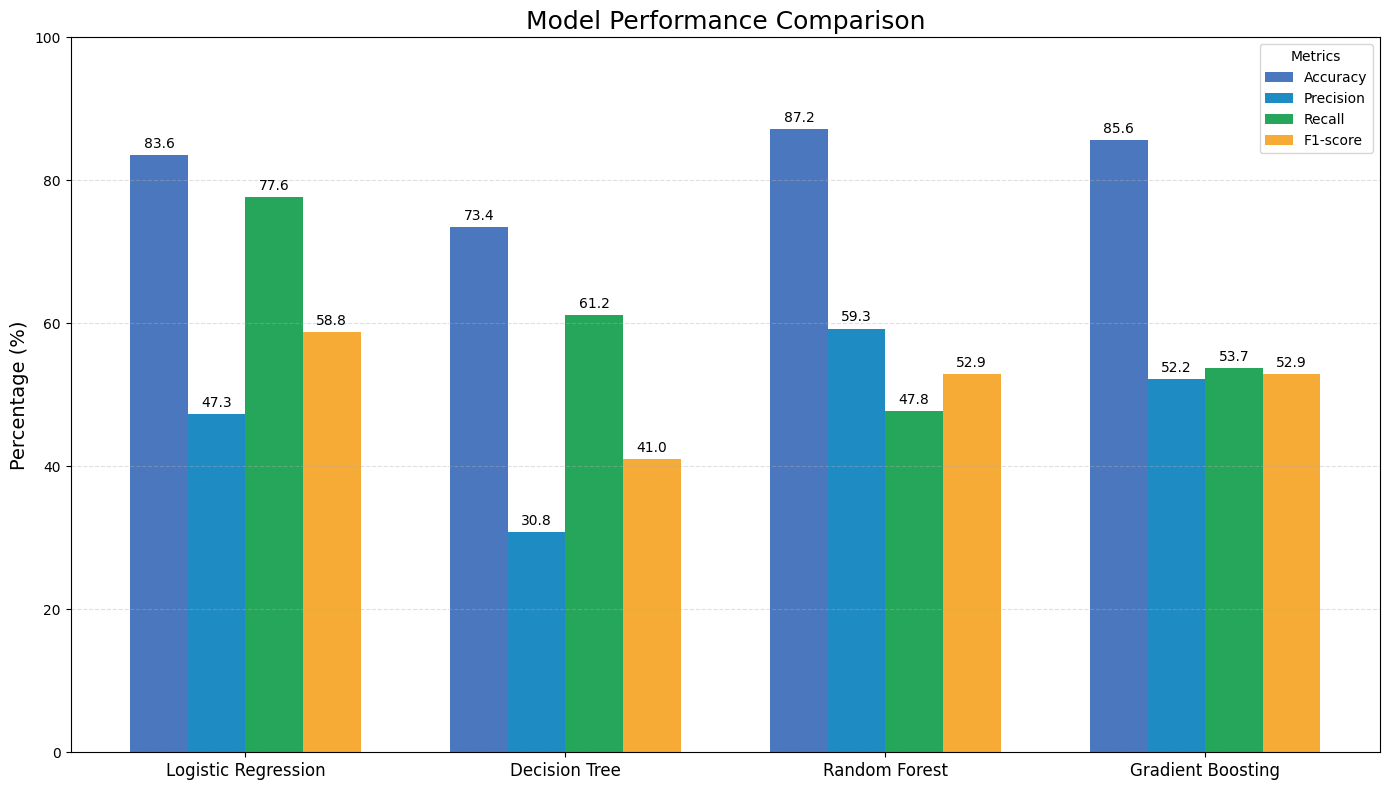

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 1. Your actual prediction variables 

models_preds = {
    "Logistic Regression": logreg_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred
}

# 2. Compute metrics for each model

results = {}

for model_name, pred in models_preds.items():
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, pred) * 100,
        "Precision": precision_score(y_test, pred, zero_division=0) * 100,
        "Recall": recall_score(y_test, pred, zero_division=0) * 100,
        "F1-score": f1_score(y_test, pred, zero_division=0) * 100
    }

# Convert to table-like lists for plotting
model_names = list(results.keys())
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

values = np.array([[results[m][metric] for m in model_names] for metric in metrics])


plt.figure(figsize=(14, 8))

bar_width = 0.18
x = np.arange(len(model_names))

colors = ["#4B77BE", "#1E8BC3", "#26A65B", "#F5AB35"]  # blue, blue-green, green, orange

for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, values[i], width=bar_width, label=metric, color=colors[i])

# Labels and formatting
plt.xticks(x + bar_width * 1.5, model_names, fontsize=12)
plt.ylabel("Percentage (%)", fontsize=14)
plt.title("Model Performance Comparison", fontsize=18)
plt.legend(title="Metrics")
plt.ylim(0, 100)

# Value labels on bars
for i in range(len(metrics)):
    for j in range(len(model_names)):
        plt.text(
            x[j] + i * bar_width,
            values[i][j] + 1,
            f"{values[i][j]:.1f}",
            ha='center',
            fontsize=10
        )

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\rr826\AppData\Local\Temp\ipykernel_29076\2198590047.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette=['steelblue', 'salmon'])


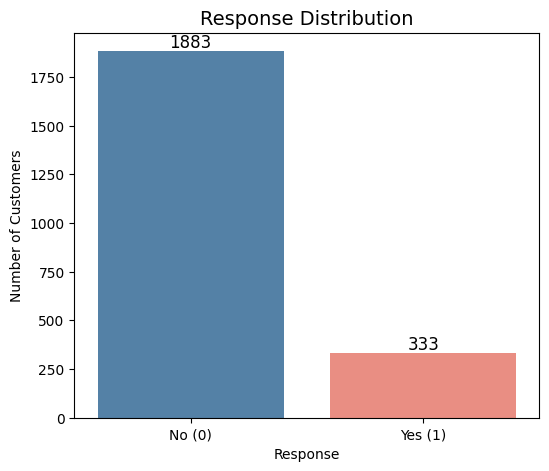

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values
response_counts = df['Response'].value_counts()

plt.figure(figsize=(6,5))
sns.barplot(x=response_counts.index, y=response_counts.values, palette=['steelblue', 'salmon'])

plt.title("Response Distribution", fontsize=14)
plt.xlabel("Response")
plt.ylabel("Number of Customers")

# To Show exact numbers on bars
for i, value in enumerate(response_counts.values):
    plt.text(i, value + 20, str(value), ha='center', fontsize=12)

plt.xticks([0, 1], ["No (0)", "Yes (1)"])
plt.show()
